<a href="https://colab.research.google.com/github/Hiroki-Abe/Baranyi_fitting/blob/main/Baranyi%20fitting/Baranyi%20fitting%20(curve_fit)%20No%20S.D.%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from tqdm.notebook import tqdm as tqdm

データ読み込み

読み込みファイル名を変更して、複数のデータに対応させる。

time, logN, s.d.のラベルは変更しない。
変更すると読み込みにエラーが発生する。
修正できるのであれば変更可

In [2]:
datafile_name = 'test1.csv'
data = pd.read_csv(datafile_name)
data

,time,logN
0,0.000,2.67
1,50.882,2.91
2,73.018,2.87
3,103.965,3.69
4,123.900,3.98
5,145.014,4.25
6,193.865,4.89
7,218.882,5.26
8,243.901,5.47
9,313.865,6.48


データを扱いやすい形に分ける

In [3]:
x_data = data['time']
y_data = data['logN']

予測モデル（数式）の定義
今回はBaranyiモデル

In [4]:
def func(x, logN0_baranyi, logN_max_baranyi, mu_baranyi, lambda_baranyi):
    f = logN_max_baranyi + np.log10((-1+np.exp(mu_baranyi*lambda_baranyi)+np.exp(mu_baranyi*x))/(-1+np.exp(mu_baranyi*x)+np.exp(mu_baranyi*lambda_baranyi)*10**(logN_max_baranyi-logN0_baranyi)))
    return f

curve_fit（最小二乗法）を使って非線形回帰
para_predにパラメータ(delta, powerの順番)、covに共分散が保存される。

In [5]:
para_pred, cov = curve_fit(func,x_data,y_data, p0=[3.5, 8, 0, 2.5])
para_pred

array([2.60808906e+00, 8.59547099e+00, 3.41280562e-02, 4.27815313e+01])

予測用の数列作成
time_intervalには0からデータの時間最大値まで１００分割した数列が入る。

In [6]:
time_min = 0
time_max = np.max(data['time'])
devide = 100
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")

予測値の計算
time_intervalにに対応する予測値をy_predに代入

In [7]:
y_pred = func(time_interval, para_pred[0], para_pred[1], para_pred[2], para_pred[3])

測定データの平均値と標準偏差の計算

In [8]:
time_list = list(set(x_data))
Means = np.empty([len(time_list)])
y_sd = np.empty([len(time_list)])
for i in range(len(time_list)):
    Means[i] = np.mean(data[(data['time'] == time_list[i])]['logN'].astype('float'))
    y_sd[i] = np.std(data[(data['time'] == time_list[i])]['logN'].astype('float'))

作図　＆　pdf保存
pdfは「データファイル名.pdf」で保存される。

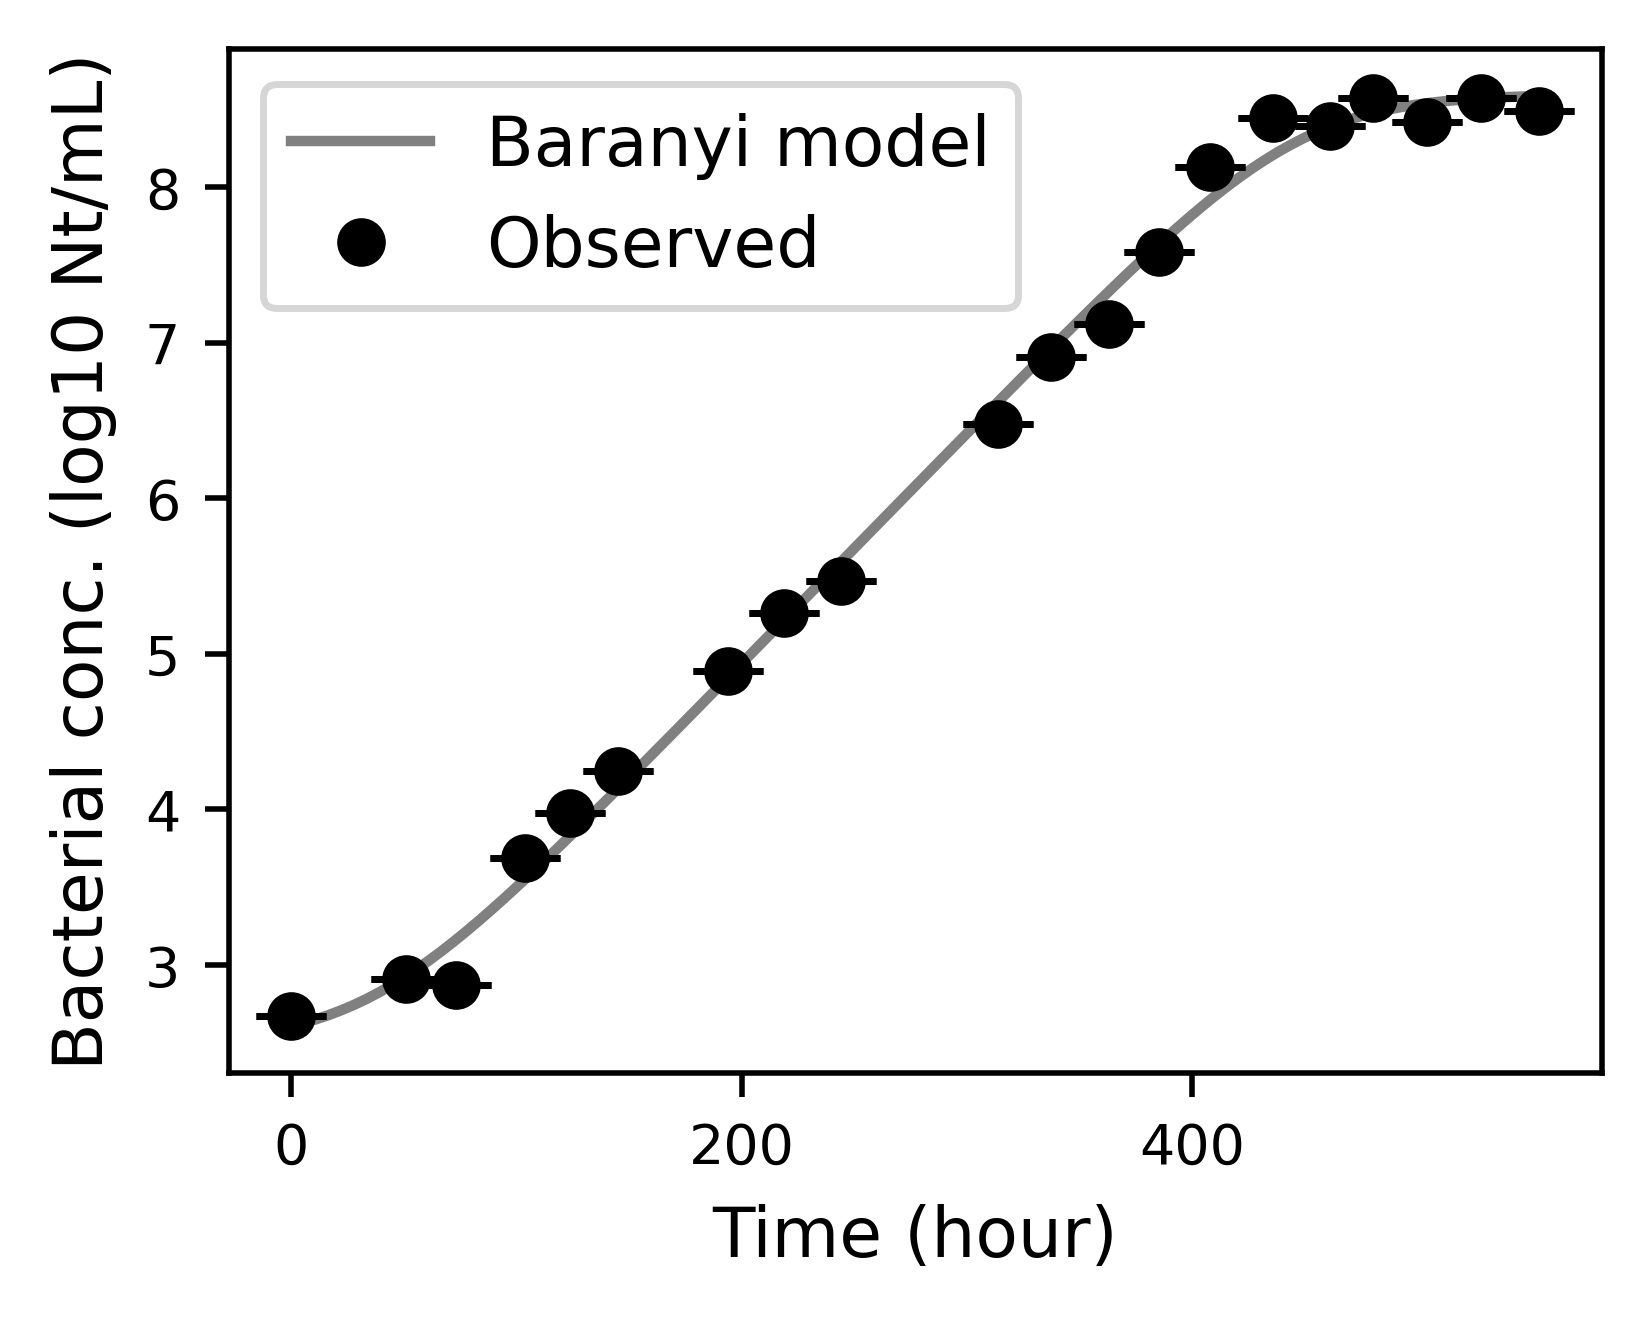

In [9]:
plt.figure(figsize=(9*0.393701,9*0.393701*3/4), dpi=500)

plt.xticks(size=8)
plt.yticks(size=8)
plt.xlabel("Time (hour)",size=10)
plt.ylabel("Bacterial conc. (log10 Nt/mL)",size=10)

plt.plot(time_interval, y_pred, color='gray', label='Baranyi model' )

plt.plot(time_list, Means, lw=0, marker='o', color='black', label='Observed')
plt.errorbar(time_list, Means, yerr=y_sd, fmt="none", color='black', capsize = 5)

plt.legend()

plt.savefig(datafile_name.replace('.csv', '.pdf'), bbox_inches="tight", dpi=500)

plt.show()

RMSEの計算（各点からのRMSE）

In [10]:
y_pred_RMSE = func(data['time'], para_pred[0], para_pred[1], para_pred[2], para_pred[3])
errors = data['logN']-y_pred_RMSE
RMSE = (np.sum(errors**2)/len(errors))**0.5
print(RMSE)

0.13419506516333027
